# Solutions to coding questions of practice midterm

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm

# 14

In [2]:
data = pd.read_csv('housing_data_train.csv')
test = pd.read_csv('housing_data_test.csv')
data.head()

,Id,BldgType,HouseStyle,OverallQual,GrLivArea,SalePrice,Neighborhood,LotArea,TotRmsAbvGrd
0,15,1Fam,1Story,6,1253,157000,NAmes,10920,5
1,17,1Fam,1Story,6,1004,149000,NAmes,11241,5
2,20,1Fam,1Story,5,1339,139000,NAmes,7560,6
3,27,1Fam,1Story,5,900,134800,NAmes,7200,5
4,29,1Fam,1Story,5,1600,207500,NAmes,16321,6


In [3]:
model = sm.ols(formula = 'SalePrice~GrLivArea+OverallQual+LotArea+TotRmsAbvGrd', data = data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     707.2
Date:                Wed, 01 Feb 2023   Prob (F-statistic):          8.83e-269
Time:                        09:05:38   Log-Likelihood:                -10346.
No. Observations:                 856   AIC:                         2.070e+04
Df Residuals:                     851   BIC:                         2.073e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -1.318e+05   8349.223    -15.786      0.000   -1.48e+05   -1.15e+05
GrLivArea       66.0374      5.650     11.687      0.000      54.947      77.128
OverallQual   3.674e+04   1297.740     28.308      0.000    3.42e+04    3.93e+04
LotArea          1.0524      0.151      6.963      0.000       0.756       1.349
TotRmsAbvGrd -3190.0280   1580.487     -2.018      0.044   -6292.138     -87.918
==============================================================================
Omnibus:                      220.950   Durbin-Watson:                   1.778
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1471.153
Skew:                           0.996   Prob(JB):                         0.00
Kurtosis:                       9.106   Cond. No.                     8.40e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.4e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 15

In [16]:
np.sqrt(model.mse_resid)

43061.08396927368

# 16

In [4]:
model = sm.ols(formula = 'SalePrice~GrLivArea+OverallQual+LotArea+BldgType', data = data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     414.7
Date:                Wed, 01 Feb 2023   Prob (F-statistic):          9.43e-269
Time:                        09:07:19   Log-Likelihood:                -10336.
No. Observations:                 856   AIC:                         2.069e+04
Df Residuals:                     848   BIC:                         2.073e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -1.379e+05   6903.293    -19.983      0.000   -1.51e+05   -1.24e+05
BldgType[T.2fmCon] -3.402e+04   9961.456     -3.415      0.001   -5.36e+04   -1.45e+04
BldgType[T.Duplex] -9149.7907   7910.993     -1.157      0.248   -2.47e+04    6377.632
BldgType[T.Twnhs]  -2.847e+04   1.01e+04     -2.832      0.005   -4.82e+04   -8736.436
BldgType[T.TwnhsE] -1.103e+04   5948.819     -1.854      0.064   -2.27e+04     648.230
GrLivArea             57.3631      3.639     15.763      0.000      50.220      64.506
OverallQual         3.699e+04   1415.272     26.137      0.000    3.42e+04    3.98e+04
LotArea                1.0079      0.152      6.616      0.000       0.709       1.307
==============================================================================
Omnibus:                      226.401   Durbin-Watson:                   1.793
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1543.620
Skew:                           1.018   Prob(JB):                         0.00
Kurtosis:                       9.256   Cond. No.                     1.03e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 17

In [5]:
data.loc[(data.BldgType!= '1Fam'),'BldgType']='Other'
#data.loc[(data.HouseStyle!= '1Story') & (data.HouseStyle!= '2Story'),'HouseStyle']='Other'
test.loc[(test.BldgType!= '1Fam'),'BldgType']='Other'
#test.loc[(test.HouseStyle!= '1Story') & (test.HouseStyle!= '2Story'),'HouseStyle']='Other'

In [6]:
test.head()

,Id,BldgType,HouseStyle,OverallQual,GrLivArea,SalePrice,Neighborhood,LotArea,TotRmsAbvGrd
0,220,Other,1Story,7,1248,167240,Blmngtn,3010,5
1,230,Other,1Story,7,1555,192500,Blmngtn,3182,7
2,386,Other,1Story,8,1269,192000,Blmngtn,3182,6
3,444,Other,1Story,7,1258,172500,Blmngtn,3922,6
4,466,Other,1Story,7,1414,178740,Blmngtn,3072,6


Predicted Price of a house = -1.389e+05 + 3.506e+04*BldgType[T.Other] + 61.03*GrLivArea -34.1667*BldgType[T.Other]:GrLivArea+3.624e+04	*OverallQual+0.9942*LotArea

Predicted Price of a 1Family house = -1.389e+05 + 61.03*GrLivArea +3.624e+04*OverallQual+0.9942*LotArea

Predicted Price of a 'Other' type of house = -1.389e+05 + 3.506e+04 + 61.03*GrLivArea -34.1667*1*GrLivArea+3.624e+04	*OverallQual+0.9942*LotArea

Predicted Price of a 1Family house - Predicted Price of a 'Other' type of house = 0 - (3.506e+04-34.1667*1*1500)

In [35]:
model = sm.ols(formula = 'SalePrice~GrLivArea+OverallQual+LotArea+BldgType*GrLivArea', data = data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     586.3
Date:                Fri, 27 Jan 2023   Prob (F-statistic):          1.45e-272
Time:                        22:34:21   Log-Likelihood:                -10334.
No. Observations:                 856   AIC:                         2.068e+04
Df Residuals:                     850   BIC:                         2.071e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                   -1.389e+05   6627.029    -20.959      0.000   -1.52e+05   -1.26e+05
BldgType[T.Other]            3.506e+04   1.56e+04      2.242      0.025    4367.666    6.58e+04
GrLivArea                      61.0313      3.655     16.700      0.000      53.858      68.204
BldgType[T.Other]:GrLivArea   -34.1667     10.004     -3.415      0.001     -53.802     -14.532
OverallQual                  3.624e+04   1297.350     27.932      0.000    3.37e+04    3.88e+04
LotArea                         0.9942      0.150      6.629      0.000       0.700       1.289
==============================================================================
Omnibus:                      211.504   Durbin-Watson:                   1.759
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1414.902
Skew:                           0.944   Prob(JB):                    5.73e-308
Kurtosis:                       9.009   Cond. No.                     1.58e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
model.params['GrLivArea']+model.params['BldgType[T.Other]:GrLivArea']

26.86454719639184

# 18

In [37]:
model.params['BldgType[T.Other]:GrLivArea']

-34.1667382782559

In [38]:
model.params['BldgType[T.Other]']+1500*(-34)

-15939.49069812354

In [39]:
-model.params['BldgType[T.Other]']-1500*model.params['BldgType[T.Other]:GrLivArea']

16189.59811550739

In [ ]:
df= pd.DataFrame 

# 19

In [40]:
pred_price = model.predict(test)
np.sqrt(((((pred_price) - test.SalePrice)**2)).mean())

41366.78832820778

# 20

C:\Users\akl0407\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

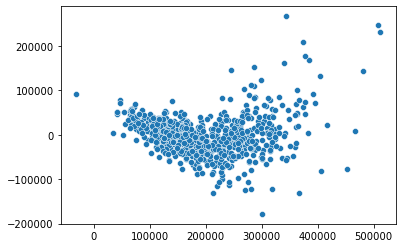

In [41]:
sns.scatterplot(model.fittedvalues, model.resid)

# 21

In [42]:
data['Qual_binned'] = pd.cut(data['OverallQual'],bins = (0,4,5,6,7,10),labels = ['Q1','Q2','Q3','Q4','Q5'])
test['Qual_binned'] = pd.cut(test['OverallQual'],bins = (0,4,5,6,7,10),labels = ['Q1','Q2','Q3','Q4','Q5'])

In [44]:
model = sm.ols(formula = 'np.log(SalePrice)~np.log(GrLivArea)+Qual_binned+HouseStyle+BldgType+LotArea+Qual_binned*HouseStyle', data = data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      np.log(SalePrice)   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     105.3
Date:                Fri, 27 Jan 2023   Prob (F-statistic):          1.17e-285
Time:                        22:34:30   Log-Likelihood:                 319.31
No. Observations:                 856   AIC:                            -560.6
Df Residuals:                     817   BIC:                            -375.3
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                  7.1058      0.217     32.702      0.000       6.679       7.532
Qual_binned[T.Q2]                          0.1811      0.067      2.687      0.007       0.049       0.313
Qual_binned[T.Q3]                          0.1508      0.071      2.118      0.034       0.011       0.291
Qual_binned[T.Q4]                          0.3460      0.092      3.745      0.000       0.165       0.527
Qual_binned[T.Q5]                          0.7604      0.117      6.483      0.000       0.530       0.991
HouseStyle[T.1.5Unf]                       0.2940      0.181      1.622      0.105      -0.062       0.650
HouseStyle[T.1Story]                       0.2462      0.067      3.694      0.000       0.115       0.377
HouseStyle[T.2.5Fin]                      -0.1344      0.182     -0.740      0.459      -0.491       0.222
HouseStyle[T.2.5Unf]                      -0.1366      0.062     -2.218      0.027      -0.257      -0.016
HouseStyle[T.2Story]                       0.0021      0.086      0.024      0.981      -0.166       0.171
HouseStyle[T.SFoyer]                       0.1731      0.182      0.952      0.341      -0.184       0.530
HouseStyle[T.SLvl]                         0.5668      0.181      3.129      0.002       0.211       0.922
BldgType[T.Other]                         -0.0654      0.017     -3.885      0.000      -0.098      -0.032
Qual_binned[T.Q2]:HouseStyle[T.1.5Unf]    -0.1261      0.220     -0.575      0.566      -0.557       0.305
Qual_binned[T.Q3]:HouseStyle[T.1.5Unf]    -0.2478      0.221     -1.122      0.262      -0.681       0.186
Qual_binned[T.Q4]:HouseStyle[T.1.5Unf] -4.633e-13   1.73e-12     -0.267      0.789   -3.87e-12    2.94e-12
Qual_binned[T.Q5]:HouseStyle[T.1.5Unf]   3.99e-12   3.43e-12      1.163      0.245   -2.75e-12    1.07e-11
Qual_binned[T.Q2]:HouseStyle[T.1Story]    -0.0429      0.074     -0.581      0.561      -0.188       0.102
Qual_binned[T.Q3]:HouseStyle[T.1Story]     0.0936      0.078      1.204      0.229      -0.059       0.246
Qual_binned[T.Q4]:HouseStyle[T.1Story]     0.0427      0.099      0.431      0.666      -0.152       0.237
Qual_binned[T.Q5]:HouseStyle[T.1Story]    -0.0806      0.120     -0.672      0.502      -0.316       0.155
Qual_binned[T.Q2]:HouseStyle[T.2.5Fin]     0.2373      0.250      0.947      0.344      -0.254       0.729
Qual_binned[T.Q3]:HouseStyle[T.2.5Fin]    -0.0561      0.221     -0.254      0.800      -0.489       0.377
Qual_binned[T.Q4]:HouseStyle[T.2.5Fin]     0.0930      0.228      0.407      0.684      -0.355       0.541
Qual_binned[T.Q5]:HouseStyle[T.2.5Fin]     0.2796      0.268      1.045      0.296      -0.246       0.805
Qual_binned[T.Q2]:HouseStyle[T.2.5Unf]    -0.2711      0.148     -1.834      0.067     

In [45]:
pred_price = model.predict(test)
np.sqrt((((np.exp(pred_price) - test.SalePrice)**2)).mean())

37198.19844421495